In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import Math
import SpectralSynthesis1D as ss

In [3]:
N =10000

In [4]:
pn = ss.pink(N)
wn = ss.white(N)
bn = ss.fbm(N,0.5)

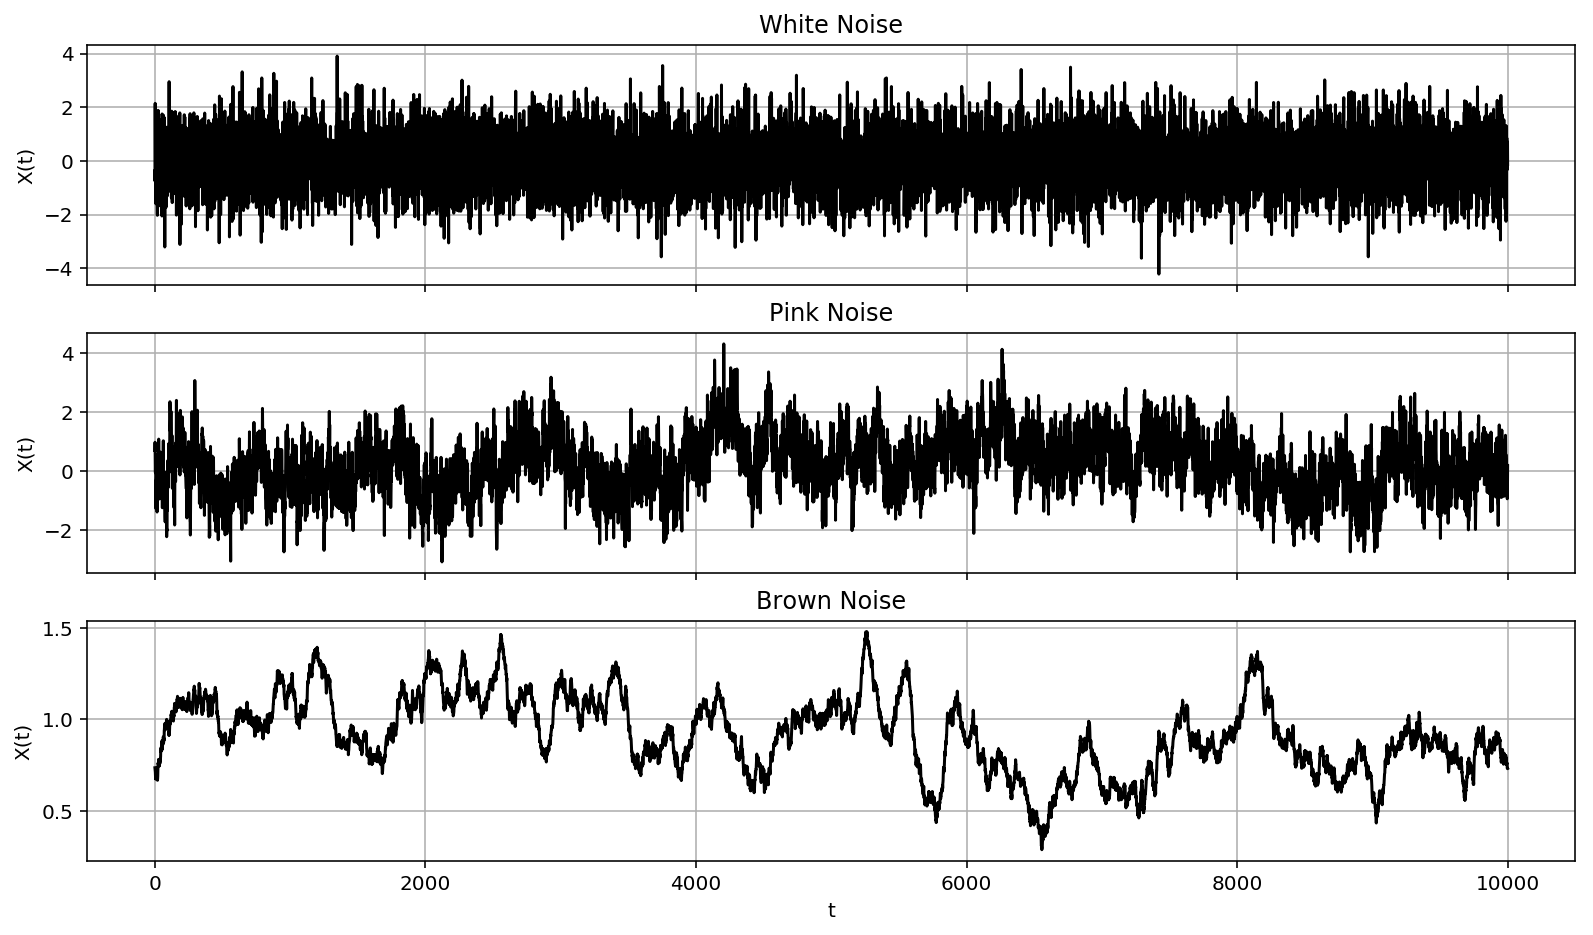

In [5]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, sharex = True,figsize=(1920/144, 1080/144), dpi=144)
ax1.grid()
ax3.grid()
ax2.grid()
ax1.plot(wn, 'k')
ax1.set_title('White Noise')
ax1.set_ylabel('X(t)')
ax2.plot(pn.real,'k')
ax2.set_title('Pink Noise')
ax2.set_ylabel('X(t)')
ax3.plot(bn.real,'k')
ax3.set_title('Brown Noise')
ax3.set_ylabel('X(t)')
ax3.set_xlabel('t')

plt.savefig('../Thesis/Images/Noise.png')
plt.show()

In [6]:
x = np.linspace(10**-10,10**0,1000)
iwn = 1/(x**0)
ipn = 1/(x**1)
ibn = 1/(x**2)

In [7]:
from scipy import signal

In [8]:
fs = 1.0
fwn, Pxx_den_wn = signal.periodogram(wn, fs)

In [9]:
fpn, Pxx_den_pn = signal.periodogram(pn, fs)

In [10]:
fbn, Pxx_den_bn = signal.periodogram(bn.real, fs)

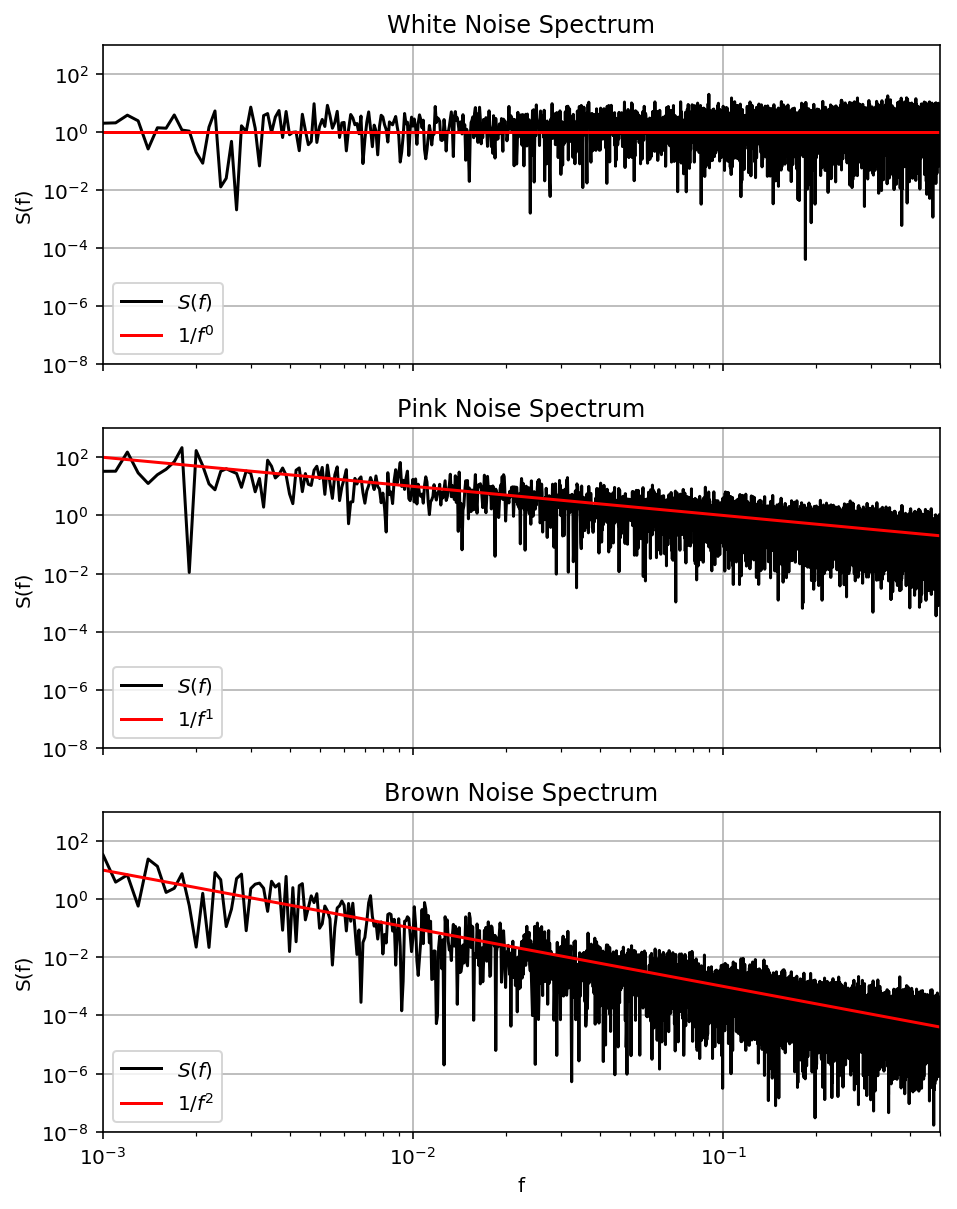

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, sharey = True, sharex = True,figsize=(1080/144, 1440/144), dpi=144)
ax1.grid()
ax3.grid()
ax2.grid()
ax1.loglog(fwn,Pxx_den_wn,'k', label = r'$S(f)$')
ax1.loglog(x,iwn,'r',label = r'$1/f^0$')
ax1.set_title('White Noise Spectrum')
ax1.set_ylabel('S(f)')
ax1.legend()
ax2.loglog(fpn.real, Pxx_den_pn.real,'k', label = r'$S(f)$')
ax2.loglog(x,ipn/10**1,'r',label = r'$1/f^1$')
ax2.set_title('Pink Noise Spectrum')
ax2.set_ylabel('S(f)')
ax2.legend()
ax3.loglog(fbn.real, Pxx_den_bn.real,'k', label = r'$S(f)$')
ax3.loglog(x,ibn/10**5,'r',label = r'$1/f^2$')
ax3.set_title('Brown Noise Spectrum')
ax3.set_ylabel('S(f)')
ax3.set_xlabel('f')
ax3.legend(loc = 3)

plt.ylim(10**-8,10**3)
plt.xlim(10**-3,max(fbn.real))
plt.savefig('../Thesis/Images/NoiseSpectrum.png')
plt.show()